In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [2]:

from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\k34s\AppData\Local\Temp\ipykernel_15816\3206389997.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('CC.csv')

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape   #checking the shape of the dataset

(284807, 31)

In [8]:
df.Class.unique()   

array([0, 1], dtype=int64)

In [9]:
df.Class.value_counts()   #checking the total unique value count of dataset

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
#its a unbalanced data so we will create a new dataset

<Axes: ylabel='count'>

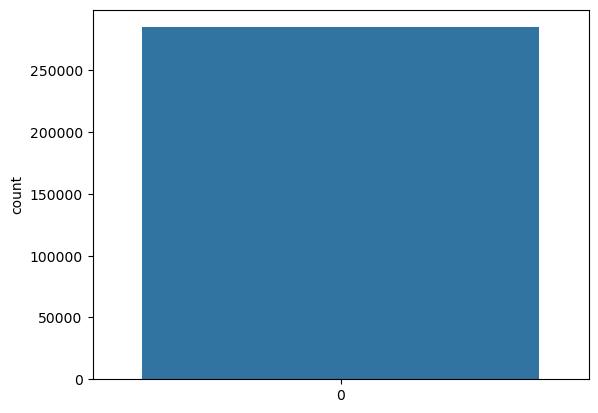

In [11]:
sns.countplot(df['Class'])

In [12]:
#taking the class 0, 1 data

In [13]:
nf = df[df.Class==0]
f = df[df.Class==1]

In [14]:
#extracting the class 0 entries

In [15]:
#Total entries are 1.5* NO. of class-1 entries
nf = nf.sample(738)

In [16]:
#creating new Dataframe
#data = f.append(nf,ignore_index=True
data = pd.concat([f, nf], ignore_index=True)

In [17]:
data.shape

(1230, 31)

In [18]:
X = data.drop(['Class'],axis=1)
y=data['Class']

In [19]:
#splitting the DATAset

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [21]:
X_train.shape,X_test.shape

((984, 30), (246, 30))

In [22]:
#Applying StandardScaler to obtain all the features in similar range

In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
X_train.shape[1]

30

In [25]:
#Searching the best Parameters for the model

In [26]:
def build_model(hp):
    model = Sequential()
    
    # Add input layer
    model.add(layers.Dense(units=hp.Int('units_0', 64, 256, 32),
                            kernel_initializer='he_uniform',
                            input_dim=X_train.shape[1],
                            activation='relu'))
    
    # Add hidden layers
    for i in range(1, hp.Int('num_layers', 2, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 64, 256, 32),
                                kernel_initializer='he_uniform',
                                activation='relu'))
    
    # Add output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [0.001, 0.0001, 0.00001])), # Adjust the learning rate
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model



In [27]:

tuner = RandomSearch(
            build_model,
            objective='accuracy',
            max_trials=5,
            executions_per_trial=3,
            directory='project1',
            project_name='Credit card fraud'
) 

Reloading Tuner from project1\Credit card fraud\tuner0.json


In [28]:
tuner.search_space_summary()
# Perform tuning


Search space summary
Default search space size: 7
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 32, 'sampling': 'linear'}


In [29]:
tuner.search(X_train,y_train,epochs=5)

In [30]:
tuner.results_summary()

Results summary
Results in project1\Credit card fraud
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 0 summary
Hyperparameters:
units_0: 160
num_layers: 4
units_1: 160
learning_rate: 0.001
units_2: 64
units_3: 64
Score: 0.9715447425842285

Trial 2 summary
Hyperparameters:
units_0: 192
num_layers: 3
units_1: 128
learning_rate: 0.001
units_2: 224
units_3: 160
Score: 0.9705284635225931

Trial 3 summary
Hyperparameters:
units_0: 192
num_layers: 2
units_1: 224
learning_rate: 0.0001
units_2: 128
units_3: 224
Score: 0.9339430928230286

Trial 1 summary
Hyperparameters:
units_0: 64
num_layers: 2
units_1: 64
learning_rate: 0.0001
units_2: 192
units_3: 160
Score: 0.853319784005483

Trial 4 summary
Hyperparameters:
units_0: 96
num_layers: 5
units_1: 96
learning_rate: 1e-05
units_2: 192
units_3: 224
units_4: 64
Score: 0.8187669316927592


In [31]:
##using the best  parameter got from Randomsearch

In [32]:
model = Sequential()
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',input_dim=X_train.shape[1],activation='relu'))
model.add(layers.Dense(units=96,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))
model.add(layers.Dense(units=128,kernel_initializer='he_uniform',activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

C:\Users\k34s\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7235 - loss: 0.6075 - val_accuracy: 0.9228 - val_loss: 0.3866
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8908 - loss: 0.4022 - val_accuracy: 0.9268 - val_loss: 0.2693
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8984 - loss: 0.3021 - val_accuracy: 0.9390 - val_loss: 0.2129
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9054 - loss: 0.2475 - val_accuracy: 0.9472 - val_loss: 0.1816
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9304 - loss: 0.2098 - val_accuracy: 0.9472 - val_loss: 0.1614
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9189 - loss: 0.2052 - val_accuracy: 0.9472 - val_loss: 0.1508
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.1535 - val_accuracy: 0.9512 - val_loss: 0.1418
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9446 - loss: 0.1632 - val_accuracy: 0.9512 - val_loss

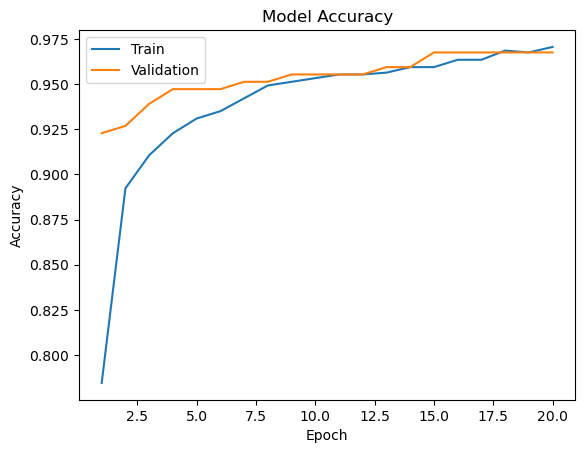

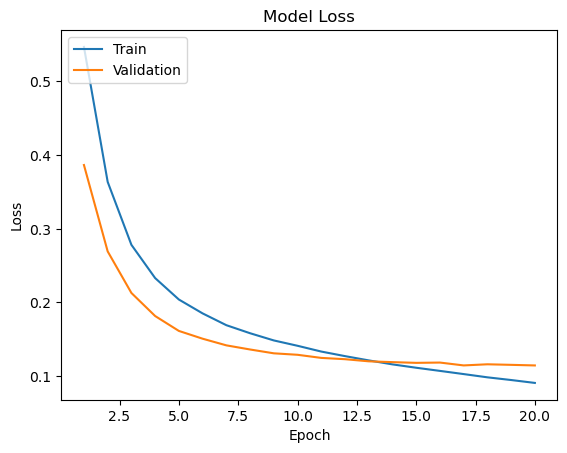

In [34]:
import matplotlib.pyplot as plt

def plotLearningCurve(history, epochs, save_path=None):
    epochRange = range(1, epochs + 1)
    
    # Plot accuracy
    plt.plot(epochRange, history.history['accuracy'])
    plt.plot(epochRange, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    if save_path:
        plt.savefig(save_path + 'loss_1.png')  # Save accuracy plot
    plt.show()  # Display the accuracy plot

    # Plot loss
    plt.plot(epochRange, history.history['loss'])
    plt.plot(epochRange, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    if save_path:
        plt.savefig(save_path + 'loss_2.png')  # Save loss plot
    plt.show()  # Display the loss plot

# Example usage:
plotLearningCurve(history, 20, save_path='static/')


In [35]:
#Predicting the test result

In [36]:
y_pred = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [37]:
y_pred = y_pred>0.5

In [38]:
#making the confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


# Extracting the number of fraud and legitimate transactions
num_fraud_transactions = cm[1, 1]
num_legitimate_transactions = cm[0, 0]

# Output the number of fraud and legitimate transactions


In [40]:
#calculate the accuracy

In [41]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print("Number of fraud transactions:", num_fraud_transactions)
print("Number of legitimate transactions:", num_legitimate_transactions)
score

Number of fraud transactions: 90
Number of legitimate transactions: 148


0.967479674796748

In [42]:
'''accuracy measures the proportion of correctly classified transactions out of all transactions.
Precision measures the proportion of correctly classified fraud transactions out of all transactions classified as fraud.
Recall measures the proportion of correctly classified fraud transactions out of all actual fraud transactions.
F1-score is the harmonic mean of precision and recall, providing a balance between the two'''

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.967479674796748
Precision: 1.0
Recall: 0.9183673469387755
F1-score: 0.9574468085106383


In [43]:
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives

# Output the counts
print("True Positives (Fraud transactions correctly classified):", TP)
print("False Positives (Legitimate transactions incorrectly classified as fraud):", FP)
print("True Negatives (Legitimate transactions correctly classified):", TN)
print("False Negatives (Fraud transactions incorrectly classified as legitimate):", FN)

True Positives (Fraud transactions correctly classified): 90
False Positives (Legitimate transactions incorrectly classified as fraud): 0
True Negatives (Legitimate transactions correctly classified): 148
False Negatives (Fraud transactions incorrectly classified as legitimate): 8


In [44]:
import sys

def outputToFile(TP, FP, TN, FN,accuracy, file_path):
    # Redirect stdout to the file
    with open(file_path, 'w') as f:
        sys.stdout = f

        # Output the counts
        print("True Positives (Fraud transactions correctly classified):", TP)
        print("False Positives (Legitimate transactions incorrectly classified as fraud):", FP)
        print("True Negatives (Legitimate transactions correctly classified):", TN)
        print("False Negatives (Fraud transactions incorrectly classified as legitimate):", FN)
        print("accuracy:",accuracy )

    # Revert stdout back to the console
    sys.stdout = sys.__stdout__

# Example usage:
outputToFile(TP, FP, TN, FN,accuracy, 'data/output_counts.txt')


In [ ]:
from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def display_text_file():
    with open('output_counts.txt', 'r') as file:
        text_content = file.read()
    return render_template('display_text.html', text_content=text_content)

if __name__ == '__main__':
    app.run(debug=True)
